<h1 align="center"><font size="5">Supervised Machine Learning: Classification - Titanic Survival Prediction</font></h1>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, precision_recall_curve, roc_curve, roc_auc_score, auc, ConfusionMatrixDisplay

# 1. About the Data

**Data Source**

[Kaggle](https://www.kaggle.com/c/titanic/data)

**Data Description**

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

---

The data has been split into two groups:

training set (train.csv)
test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

**Data Dictionary**

| Variable  | Definition                        | Key                                  |
|-----------|-----------------------------------|--------------------------------------|
| survival  | Survival                          | 0 = No, 1 = Yes                     |
| pclass    | Ticket class                      | 1 = 1st, 2 = 2nd, 3 = 3rd           |
| sex       | Sex                               |                                      |
| age       | Age                               | in years                            |
| sibsp     | # of siblings/spouses aboard     |                                      |
| parch     | # of parents/children aboard     |                                      |
| ticket    | Ticket number                     |                                      |
| fare      | Passenger fare                    |                                      |
| cabin     | Cabin number                      |                                      |
| embarked  | Port of Embarkation               | C = Cherbourg, Q = Queenstown, S = Southampton |

---

**Variable Notes**

    pclass: A proxy for socio-economic status (SES)
            - 1st = Upper
            - 2nd = Middle
            - 3rd = Lower
    age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
    sibsp: The dataset defines family relations in this way...
            - Sibling = brother, sister, stepbrother, stepsister
            - Spouse = husband, wife (mistresses and fiancés were ignored)
    parch: The dataset defines family relations in this way...
            - Parent = mother, father
            - Child = daughter, son, stepdaughter, stepson
            - Some children travelled only with a nanny, therefore parch=0 for them.

**Importing Dataset:**

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df = pd.read_csv('datasets/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Note**：

- **Cabin** The missing values more than 50%, so I consider to exclude this column from our observation.
- **Age** There are several missing values, but just a few percentage of the data, so I consider to do imputation on this feature.  
- **Embarked** There are 2 missing values, so I consider just to drop these rows, because it will not be significant.

In [5]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# 2. Objectives

The main objective of this analysis is to develop a predictive model that accurately determines whether a passenger survived the Titanic disaster. The focus will be on ***prediction***, meaning the goal is to maximize the model's accuracy in classifying survival outcomes rather than interpreting the underlying relationships between variables. The primary metric for evaluation will be ***accuracy***, ensuring that the model correctly predicts survival status for as many passengers as possible.

# 3. Models

## a. Data Cleaning

In [6]:
# Dropping irrelevant features
df_drop = df.drop(columns=['Name', 'Ticket', 'Cabin'])
df_drop

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [7]:
# Checking for duplicated values
df_drop.duplicated().sum()

np.int64(0)

In [8]:
# Checking for null values
df_drop.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [9]:
# Drop 2 missing values in 'Embarked' column
df_drop1 = df_drop.copy()
df_drop1 = df_drop.dropna(subset=['Embarked'])
df_drop1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [10]:
# Imputating missing values in 'Age' column with median
df_imputate = df_drop1.copy()
df_imputate['Age'].fillna(df_imputate['Age'].median(), inplace=True)
df_imputate.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [11]:
# Age binning
df_bin = df_imputate.copy()
bins = [0, 12, 18, 35, 60, 80]
labels = ['child', 'teenager', 'young adult', 'adult', 'senior']
df_bin['Age_Bin'] = pd.cut(df_bin['Age'], bins=bins, labels=labels)
df_bin

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Bin
0,1,0,3,male,22.0,1,0,7.2500,S,young adult
1,2,1,1,female,38.0,1,0,71.2833,C,adult
2,3,1,3,female,26.0,0,0,7.9250,S,young adult
3,4,1,1,female,35.0,1,0,53.1000,S,young adult
4,5,0,3,male,35.0,0,0,8.0500,S,young adult
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,young adult
887,888,1,1,female,19.0,0,0,30.0000,S,young adult
888,889,0,3,female,28.0,1,2,23.4500,S,young adult
889,890,1,1,male,26.0,0,0,30.0000,C,young adult


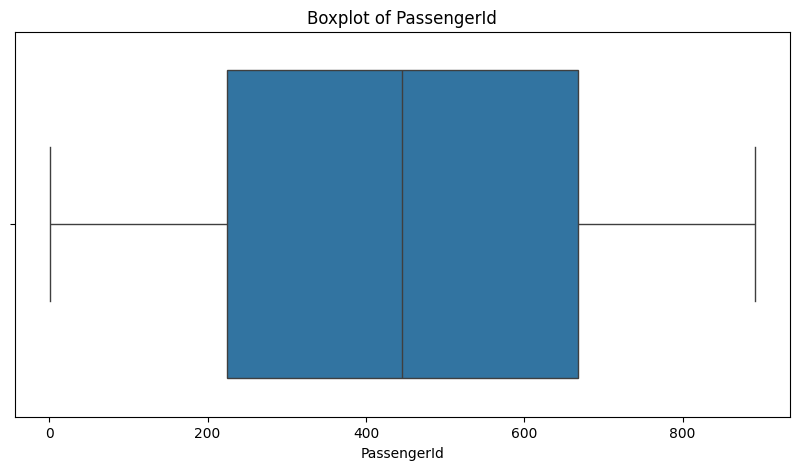

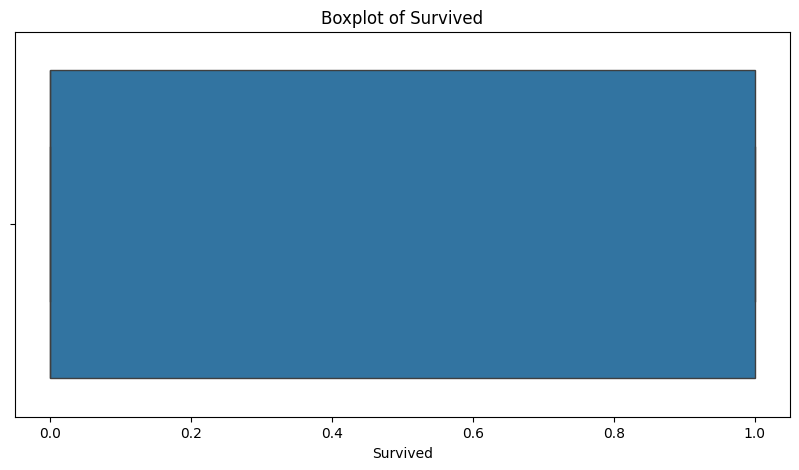

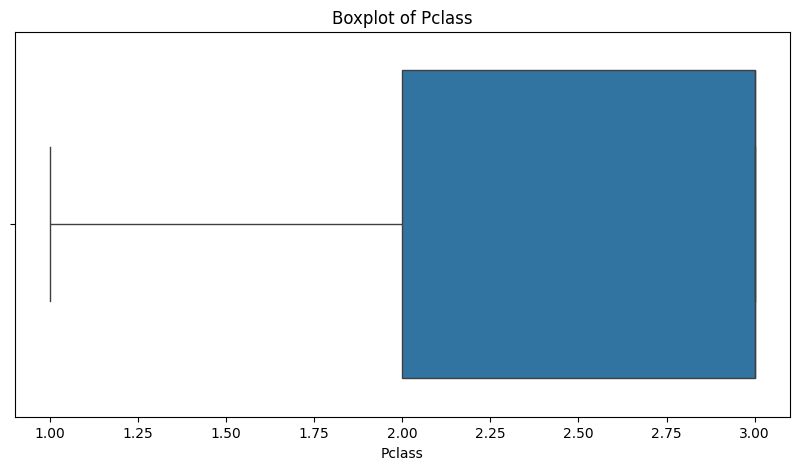

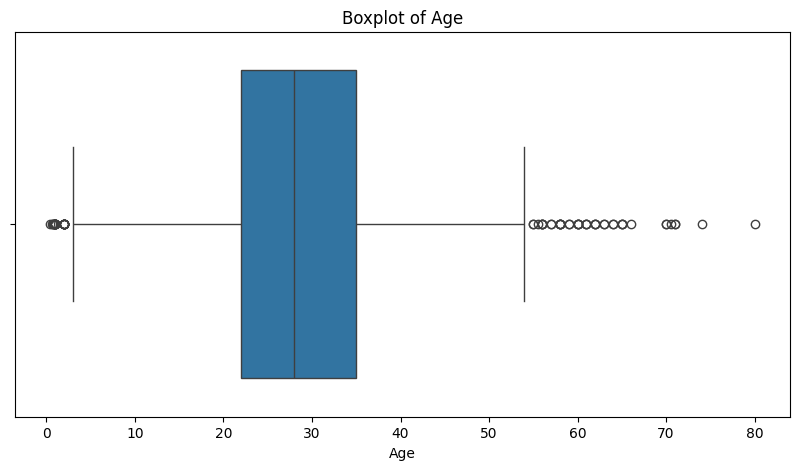

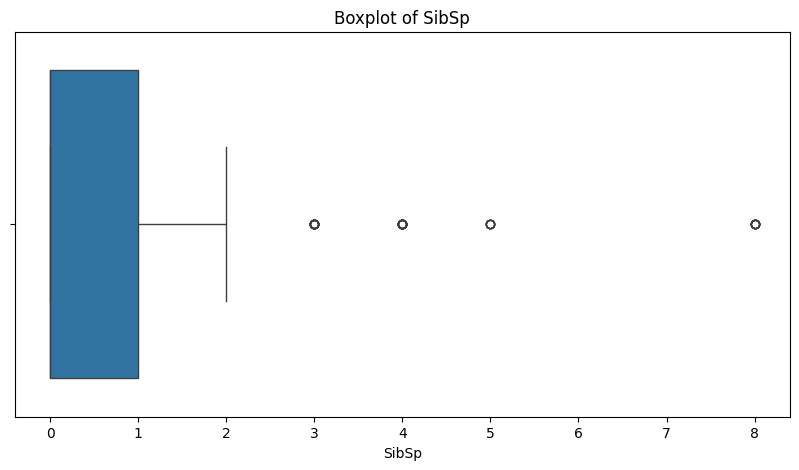

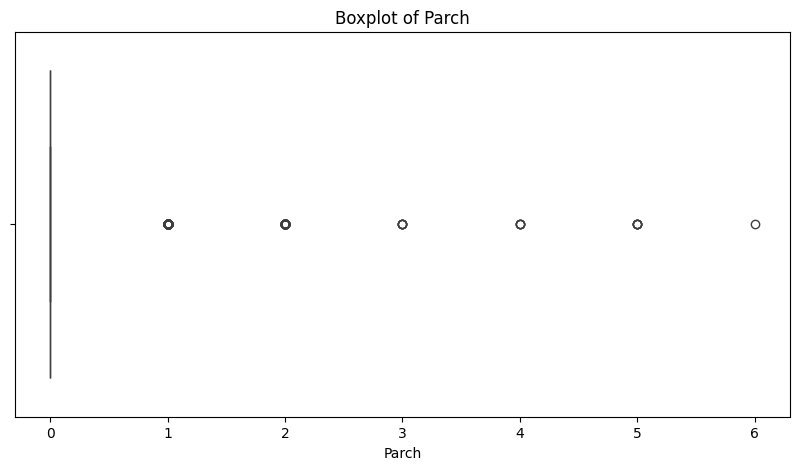

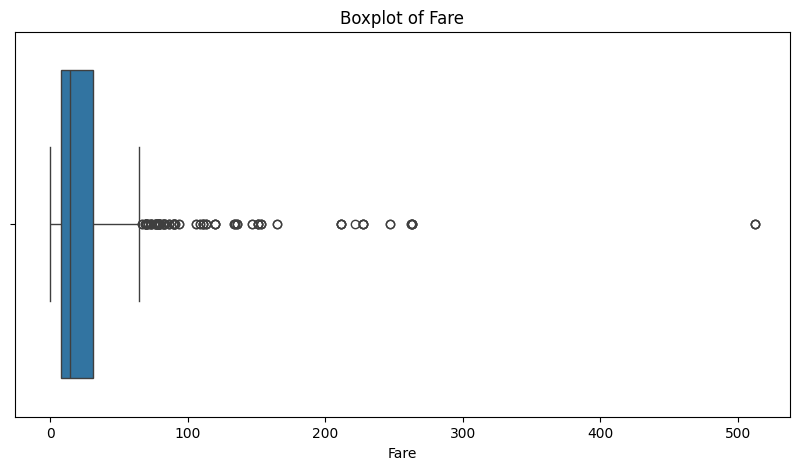

In [12]:
# Check for outliers in numerical features
numerical_features = df_bin.select_dtypes(include=[np.number]).columns.tolist()
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df_bin[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


Note: The outlier seems not due to input errors and are valid data points, so I consider to keep the outliers, because the outliers might be meaningful and represent valid cases.

## b. EDA

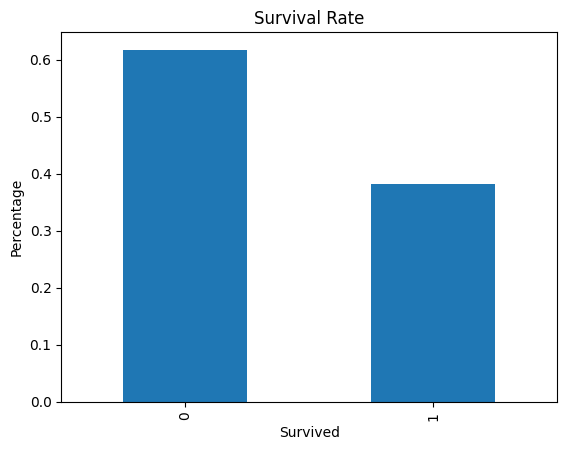

In [13]:
# Survival rate (Normalized)
df_bin['Survived'].value_counts(normalize=True).plot(kind='bar')
plt.title('Survival Rate')
plt.xlabel('Survived')
plt.ylabel('Percentage')
plt.show()

Note: 40% of passengers survived, while the remaining 60% did not. Therefore, the baseline accuracy of the model would be 60% if it always predicts that a passenger did not survive.

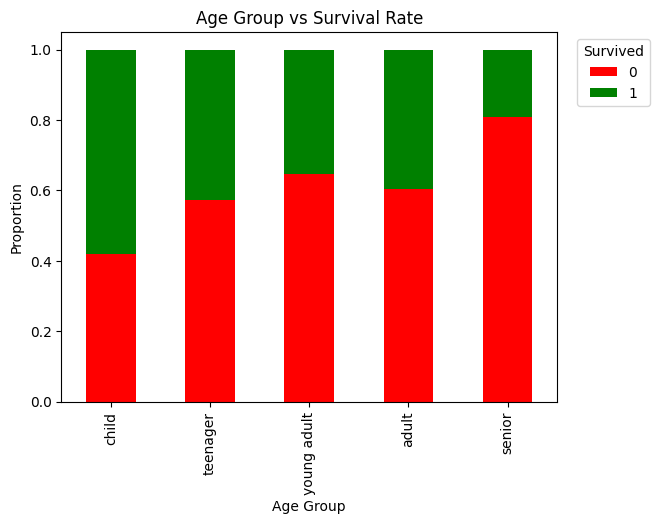

In [14]:
# Relationship between Age and Survival (Normalized
age_survival_rate = df_bin.groupby('Age_Bin')['Survived'].value_counts(normalize=True).unstack()
age_survival_rate.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Age Group vs Survival Rate')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.legend(title='Survived', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

Note: Children have the highest survival rate (almost 60%), which suggests that during the evacuation process, priority might have been given to children. This aligns with the "women and children first" protocol often followed in such emergencies. This insight highlights the importance of age as a significant factor in predicting survival on the Titanic.

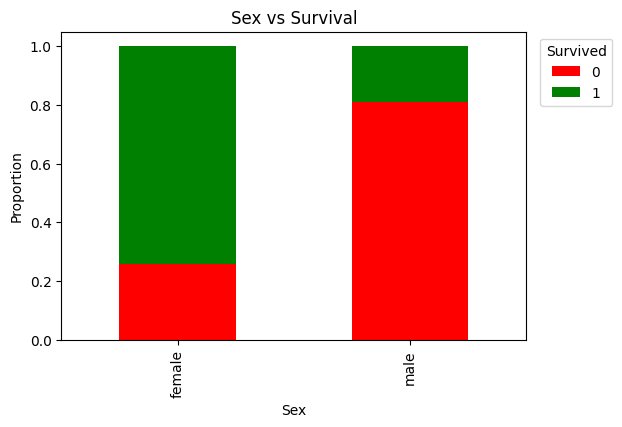

In [15]:
# Relationship between Sex and Survival (Normalized)
sex_survival_rate = df_bin.groupby('Sex')['Survived'].value_counts(normalize=True).unstack()
sex_survival_rate.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(6, 4))
plt.title('Sex vs Survival')
plt.xlabel('Sex')
plt.ylabel('Proportion')
plt.legend(title='Survived', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

Note: Females have a high survival rate (about 75%), while males have only about 20% survival rate. This suggests that women were likely given priority during the evacuation process, consistent with the "women and children first" protocol often followed in such emergencies. Gender is therefore a significant factor in predicting survival on the Titanic.

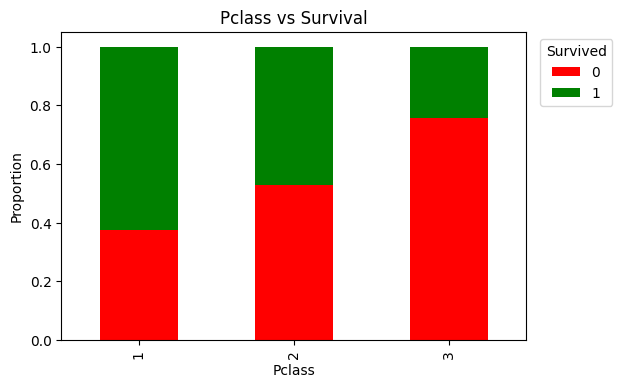

In [16]:
# Relationship between Pclass and Survival (Normalized)
pclass_survival_rate = df_bin.groupby('Pclass')['Survived'].value_counts(normalize=True).unstack()
pclass_survival_rate.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(6, 4))
plt.title('Pclass vs Survival')
plt.xlabel('Pclass')
plt.ylabel('Proportion')
plt.legend(title='Survived', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

Note: The survival rate varies significantly across different passenger classes. First-class passengers have the highest survival rate, followed by second-class passengers, while third-class passengers have the lowest survival rate. This indicates that socio-economic status, as represented by passenger class, played a significant role in determining survival on the Titanic.

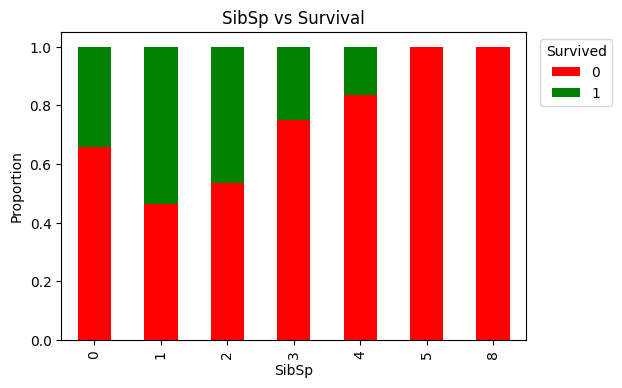

In [17]:
# Relationship between SibSp and Survival (Normalized)
sibsp_survival_rate = df_bin.groupby('SibSp')['Survived'].value_counts(normalize=True).unstack()
sibsp_survival_rate.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(6, 4))
plt.title('SibSp vs Survival')
plt.xlabel('SibSp')
plt.ylabel('Proportion')
plt.legend(title='Survived', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

Passengers with 1 or 2 siblings/spouses aboard had a higher survival rate compared to those with no siblings/spouses or with more than 2. This suggests that having a small family group aboard may have positively influenced survival chances, possibly due to better coordination during the evacuation process.

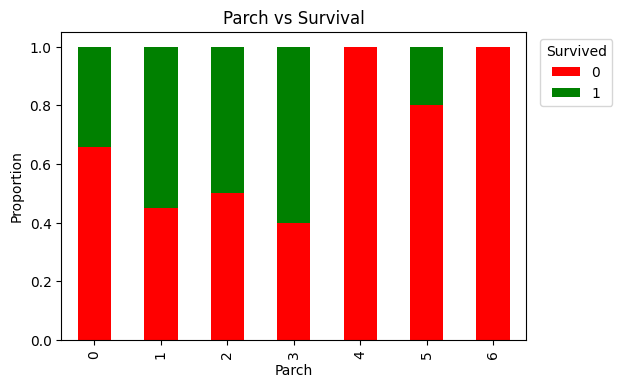

In [18]:
# Relationship between Parch and Survival (Normalized)
parch_survival_rate = df_bin.groupby('Parch')['Survived'].value_counts(normalize=True).unstack()
parch_survival_rate.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(6, 4))
plt.title('Parch vs Survival')
plt.xlabel('Parch')
plt.ylabel('Proportion')
plt.legend(title='Survived', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

Passengers with 1 to 3 parents/children aboard had a higher survival rate compared to those with no parents/children or with more than 3. This suggests that having a small family group aboard may have positively influenced survival chances, possibly due to better coordination and support during the evacuation process.

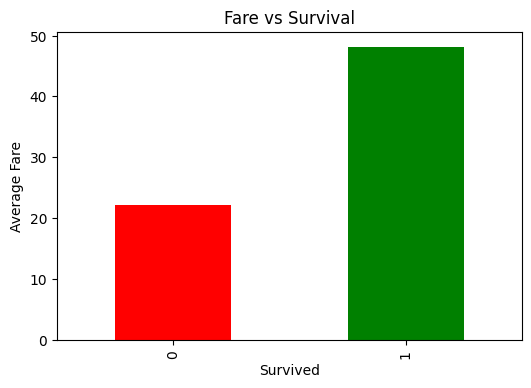

In [131]:
# Relationship between Fare and Survival
fare_survival_rate = df_bin.groupby('Survived')['Fare'].mean()
fare_survival_rate.plot(kind='bar', color=['red', 'green'], figsize=(6, 4))
plt.title('Fare vs Survival')
plt.xlabel('Survived')
plt.ylabel('Average Fare')
plt.show()

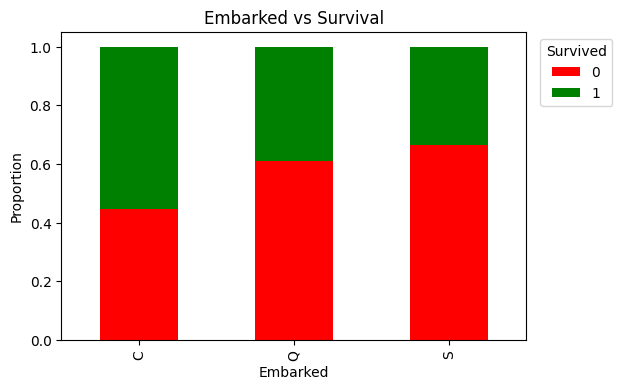

In [20]:
# Relationship between Embarked and Survival (Normalized)
embarked_survival_rate = df_bin.groupby('Embarked')['Survived'].value_counts(normalize=True).unstack()
embarked_survival_rate.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(6, 4))
plt.title('Embarked vs Survival')
plt.xlabel('Embarked')
plt.ylabel('Proportion')
plt.legend(title='Survived', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

Note: Passengers who embarked at Cherbourg (C) had the highest survival rate, followed by those who embarked at Southampton (S), while passengers who embarked at Queenstown (Q) had the lowest survival rate. This suggests that the port of embarkation may have influenced survival chances, possibly due to differences in socio-economic status or cabin allocation among passengers from different ports.

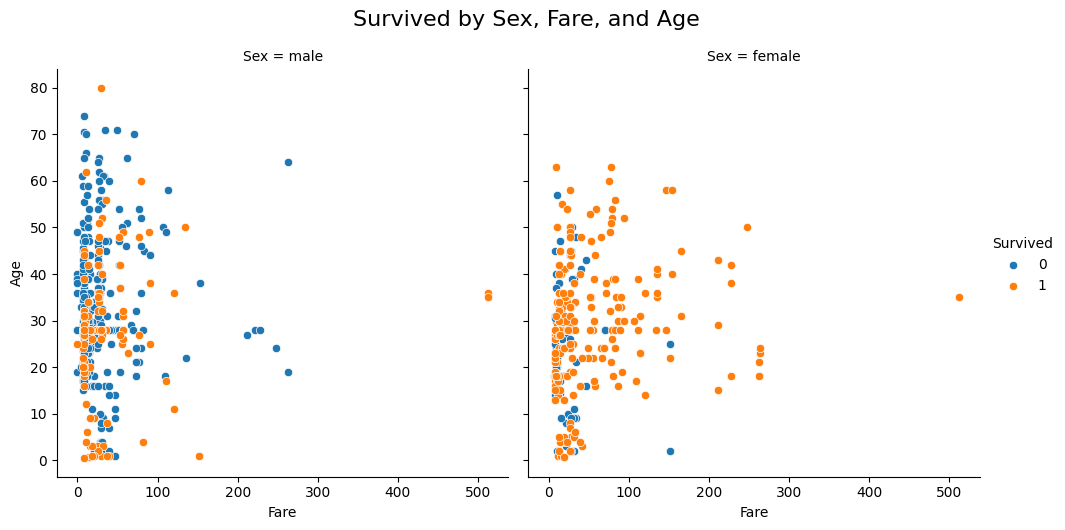

In [137]:
# Relationship between Sex, Fare, Age, and Survival
sns.FacetGrid(df_bin, hue='Survived', col='Sex', height=5).map(sns.scatterplot, 'Fare', 'Age').add_legend()
plt.suptitle('Survived by Sex, Fare, and Age', size=16, y=1.05)
plt.show()

Note:
- There are 3 outliers with fare above \$500.
- Most of the passengers are in the Fare range of \$0 to \$100, where survival rates very significantly depend on gender and age.
- Higher fare increases survival chance.
- Younger age have relative higher survival rates.
- Females have higher survival rates.

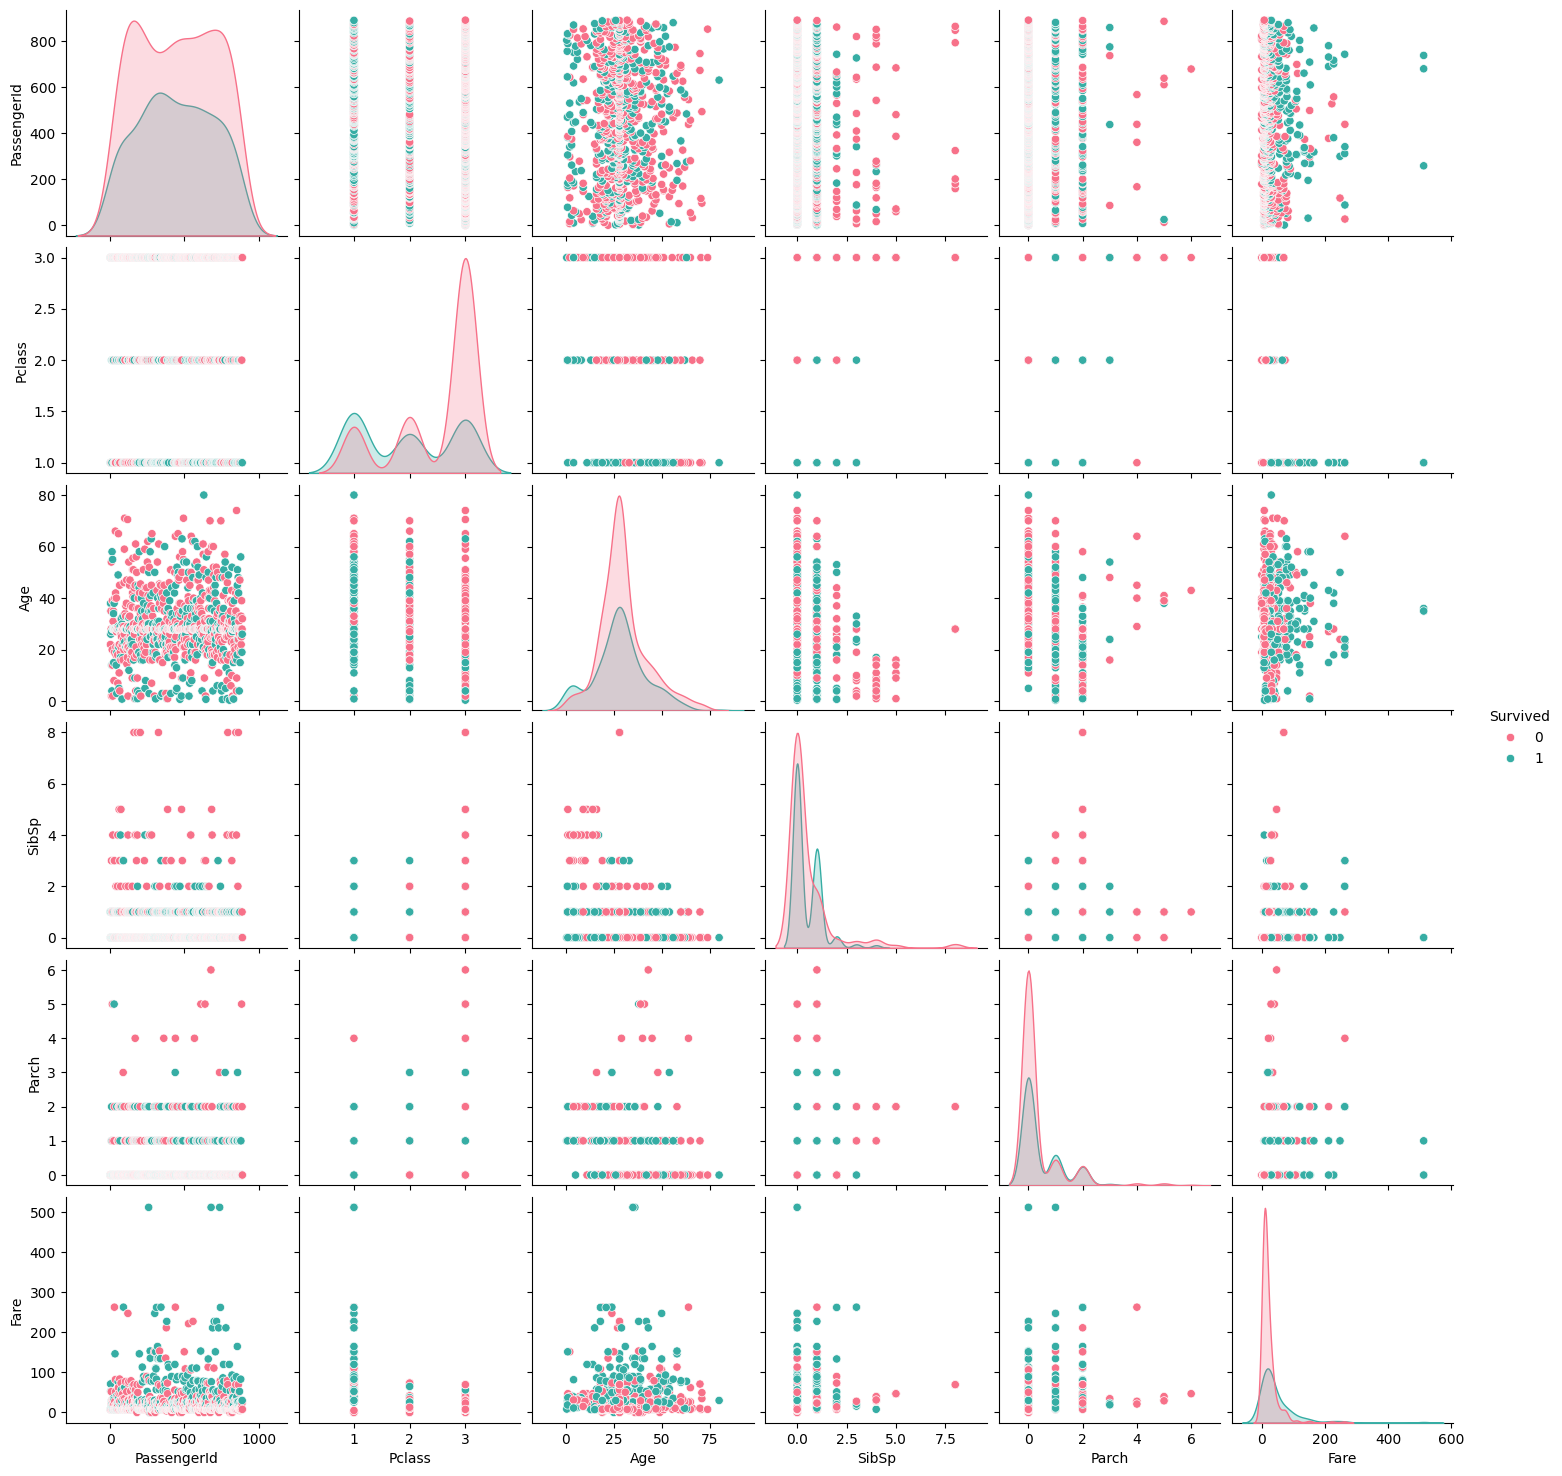

In [21]:
# Pairplot
sns.pairplot(df_bin, hue='Survived', diag_kind='kde', palette='husl')
plt.show()

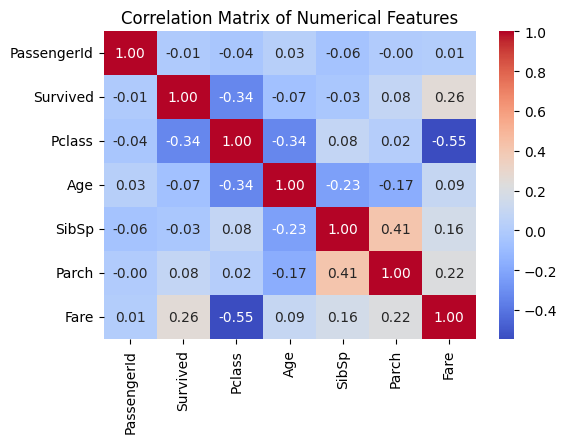

In [22]:
# Visualize correlation of numerical features
numerical_features = df_bin.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(6, 4))
sns.heatmap(df_bin[numerical_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [23]:
# Sort correlation features with respect to 'Survived'
correlation = df_bin[numerical_features].corr()['Survived'].abs().sort_values(ascending=False)[1:]
correlation

Pclass         0.335549
Fare           0.255290
Parch          0.083151
Age            0.069822
SibSp          0.034040
PassengerId    0.005028
Name: Survived, dtype: float64

## c. Feature Engineering

In [24]:
data_engineered = df_bin.copy()

# Create Family_Size feature basd on SibSp and Parch
data_engineered['Family_Size'] = data_engineered['SibSp'] + data_engineered['Parch'] + 1

# Create Is_Alone feature
data_engineered['Is_Alone'] = np.where(data_engineered['Family_Size'] == 1, 1, 0)

## d. Feature Encoding

In [25]:
data_engineered

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Bin,Family_Size,Is_Alone
0,1,0,3,male,22.0,1,0,7.2500,S,young adult,2,0
1,2,1,1,female,38.0,1,0,71.2833,C,adult,2,0
2,3,1,3,female,26.0,0,0,7.9250,S,young adult,1,1
3,4,1,1,female,35.0,1,0,53.1000,S,young adult,2,0
4,5,0,3,male,35.0,0,0,8.0500,S,young adult,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,young adult,1,1
887,888,1,1,female,19.0,0,0,30.0000,S,young adult,1,1
888,889,0,3,female,28.0,1,2,23.4500,S,young adult,4,0
889,890,1,1,male,26.0,0,0,30.0000,C,young adult,1,1


In [26]:
data_engineered['Sex'].unique()

array(['male', 'female'], dtype=object)

Note: Because there are only 2 categories, I would use Label Encoding.

In [27]:
data_engineered['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

Note: Because there are just 3 categories, and the feature is a nominal (does not have order), then I would use OneHot Encoding.

In [28]:
# Encoding categorical features
data_encoded = data_engineered.copy()


# Label Encoding for "Sex" feature
sex_encoder = LabelEncoder()
data_encoded["Sex"] = sex_encoder.fit_transform(data_encoded["Sex"])
# Female: 0, Male: 1


# One Hot Encoding for "Embarked" feature
embarked_encoder = OneHotEncoder(sparse_output=False, drop='first')
embarked_encoded = embarked_encoder.fit_transform(data_encoded[["Embarked"]])

encoded_df = pd.DataFrame(embarked_encoded, 
                          columns=embarked_encoder.get_feature_names_out(["Embarked"]), 
                          index=data_encoded.index)

data_encoded = data_encoded.join(pd.DataFrame(encoded_df, columns=embarked_encoder.get_feature_names_out(["Embarked"])))
data_encoded = data_encoded.drop(columns=["Embarked"])
# C: 00, Q: 10, S: 01

data_encoded

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Age_Bin,Family_Size,Is_Alone,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,young adult,2,0,0.0,1.0
1,2,1,1,0,38.0,1,0,71.2833,adult,2,0,0.0,0.0
2,3,1,3,0,26.0,0,0,7.9250,young adult,1,1,0.0,1.0
3,4,1,1,0,35.0,1,0,53.1000,young adult,2,0,0.0,1.0
4,5,0,3,1,35.0,0,0,8.0500,young adult,1,1,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,young adult,1,1,0.0,1.0
887,888,1,1,0,19.0,0,0,30.0000,young adult,1,1,0.0,1.0
888,889,0,3,0,28.0,1,2,23.4500,young adult,4,0,0.0,1.0
889,890,1,1,1,26.0,0,0,30.0000,young adult,1,1,0.0,0.0


In [29]:
# Check the correlation with the target variable again
numerical_features = data_encoded.select_dtypes(include=[np.number]).columns
correlation = data_encoded[numerical_features].corr()['Survived'].abs().sort_values(ascending=False)[1:]
correlation

Sex            0.541585
Pclass         0.335549
Fare           0.255290
Is_Alone       0.206207
Embarked_S     0.151777
Parch          0.083151
Age            0.069822
SibSp          0.034040
Family_Size    0.018277
PassengerId    0.005028
Embarked_Q     0.004536
Name: Survived, dtype: float64

Note: The new features after feature engineering and feature encoding do have a good correlation with the target variable, especially **Sex** (0.54), **Is_Alone** (0.21, which is better than Parch and SibSp)

In [30]:
# Drop irrelevant features
data_cleaned = data_encoded.copy()
data_cleaned = data_cleaned.drop(columns=['SibSp', 'Parch', 'Family_Size', 'Age_Bin', 'Embarked_Q'])
data_cleaned

,PassengerId,Survived,Pclass,Sex,Age,Fare,Is_Alone,Embarked_S
0,1,0,3,1,22.0,7.2500,0,1.0
1,2,1,1,0,38.0,71.2833,0,0.0
2,3,1,3,0,26.0,7.9250,1,1.0
3,4,1,1,0,35.0,53.1000,0,1.0
4,5,0,3,1,35.0,8.0500,1,1.0
...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,13.0000,1,1.0
887,888,1,1,0,19.0,30.0000,1,1.0
888,889,0,3,0,28.0,23.4500,0,1.0
889,890,1,1,1,26.0,30.0000,1,0.0


## d. Train - Test Split

In [80]:
X = data_cleaned.drop(columns=['PassengerId', 'Survived'])
y = data_cleaned['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((711, 6), (178, 6), (711,), (178,))

In [81]:
# from sklearn.model_selection import StratifiedShuffleSplit
# sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# for train_index, test_index in sss.split(data_cleaned, data_cleaned[['Survived', 'Pclass', 'Sex']]):
#     train_set = data_cleaned.iloc[train_index]
#     test_set = data_cleaned.iloc[test_index]

In [82]:
# X_train = train_set.drop(columns=['PassengerId', 'Survived'])
# y_train = train_set['Survived']
# X_test = test_set.drop(columns=['PassengerId', 'Survived'])
# y_test = test_set['Survived']
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

## e. Data Scaling

In [83]:
# Exclude the categorical features from scaling
scaling_feature = ['Age', 'Fare']

s = StandardScaler()
X_train_s = X_train.copy()
X_test_s = X_test.copy()

X_train_s[scaling_feature] = s.fit_transform(X_train[scaling_feature])
X_test_s[scaling_feature] = s.transform(X_test[scaling_feature])

## f. Model Training

In [84]:
def classification_report_highlighted(y_true, y_pred):
    """
    Prints a classification report with recall highlighted,
    as recall is the main objective.

    Args:
        y_true (array-like): True labels
        y_pred (array-like): Predicted labels
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='binary')  # Change to 'macro' for multi-class
    recall = recall_score(y_true, y_pred, average='binary')
    f1 = f1_score(y_true, y_pred, average='binary')

    print("=" * 40)
    print("🔹 Classification Report")
    print("=" * 40)
    print(f"🚨 Accuracy   : \033[1m{accuracy:.4f}\033[0m  (Main Objective!)") # Highlight accuracy
    print(f"✅ Precision  : {precision:.4f}")
    print(f"✅ Recall     : {recall:.4f}")
    print(f"✅ F1 Score   : {f1:.4f}")
    print("=" * 40)

    # Print the full classification report
    print("\n🔹 Detailed Report:")
    print(classification_report(y_true, y_pred))

### 1) Logistic Regression

In [85]:
lr = LogisticRegression(random_state=42)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],       # Regularization type
    'solver': ['liblinear', 'saga']  # Solvers that support l1 and l2 penalties
}

lr_gs = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

lr_gs.fit(X_train_s, y_train)
print("Best parameters found: ", lr_gs.best_params_)
print("Best cross-validation score: ", lr_gs.best_score_)

best_lr = lr_gs.best_estimator_
yhat = best_lr.predict(X_test_s)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters found:  {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
Best cross-validation score:  0.7932827735644638


In [86]:
classification_report_highlighted(y_test, yhat)

🔹 Classification Report
🚨 Accuracy   : 0.7978  (Main Objective!)
✅ Precision  : 0.7581
✅ Recall     : 0.6912
✅ F1 Score   : 0.7231

🔹 Detailed Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       110
           1       0.76      0.69      0.72        68

    accuracy                           0.80       178
   macro avg       0.79      0.78      0.78       178
weighted avg       0.80      0.80      0.80       178



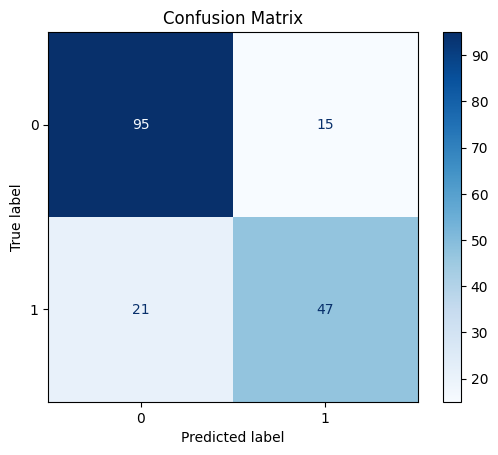

In [87]:
ConfusionMatrixDisplay.from_estimator(best_lr, X_test_s, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

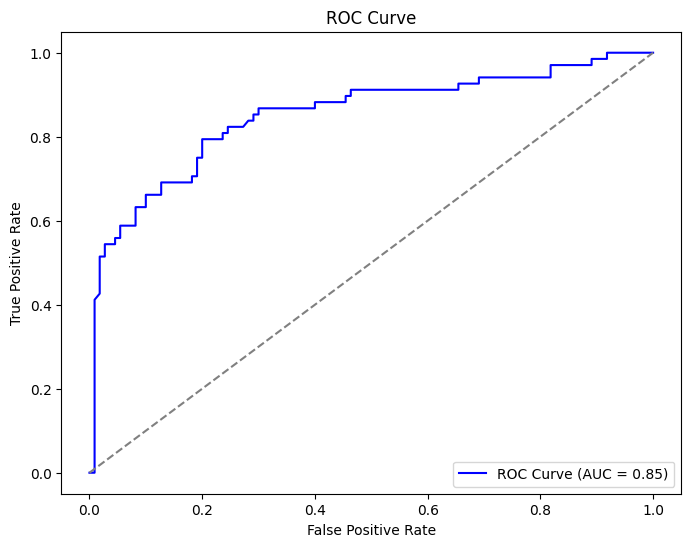

In [88]:
# Get predicted probabilities
y_prob = best_lr.predict_proba(X_test_s)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

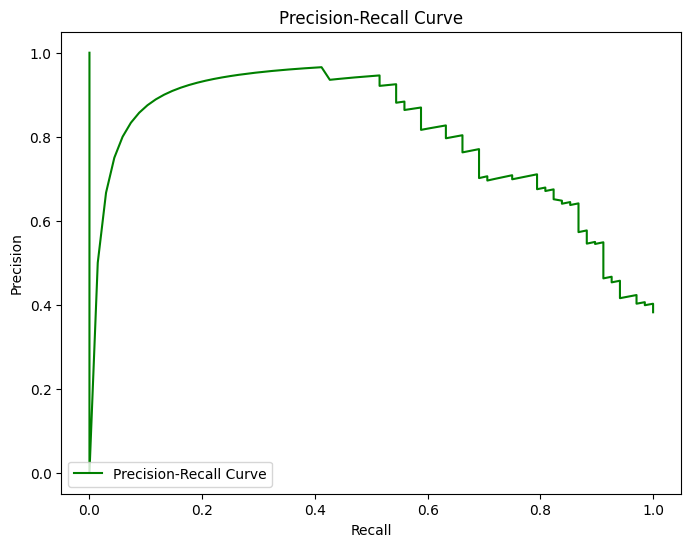

In [89]:
# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

### 2) KNN

In [90]:
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

knn_gs = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

knn_gs.fit(X_train_s, y_train)
print("Best parameters found: ", knn_gs.best_params_)
print("Best cross-validation score: ", knn_gs.best_score_)

best_knn = knn_gs.best_estimator_
yhat = best_knn.predict(X_test_s)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found:  {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
Best cross-validation score:  0.8059588299024918


In [91]:
classification_report_highlighted(y_test, yhat)

🔹 Classification Report
🚨 Accuracy   : 0.7921  (Main Objective!)
✅ Precision  : 0.7385
✅ Recall     : 0.7059
✅ F1 Score   : 0.7218

🔹 Detailed Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       110
           1       0.74      0.71      0.72        68

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178



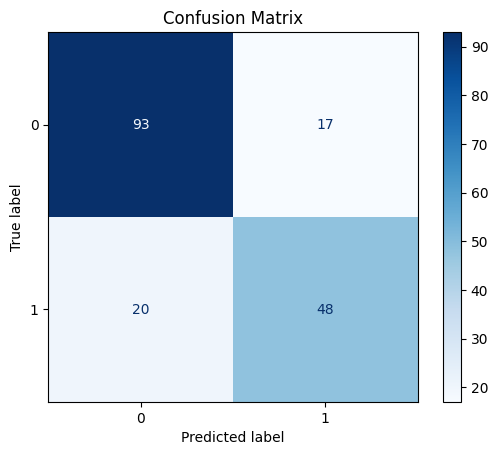

In [92]:
ConfusionMatrixDisplay.from_estimator(best_knn, X_test_s, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

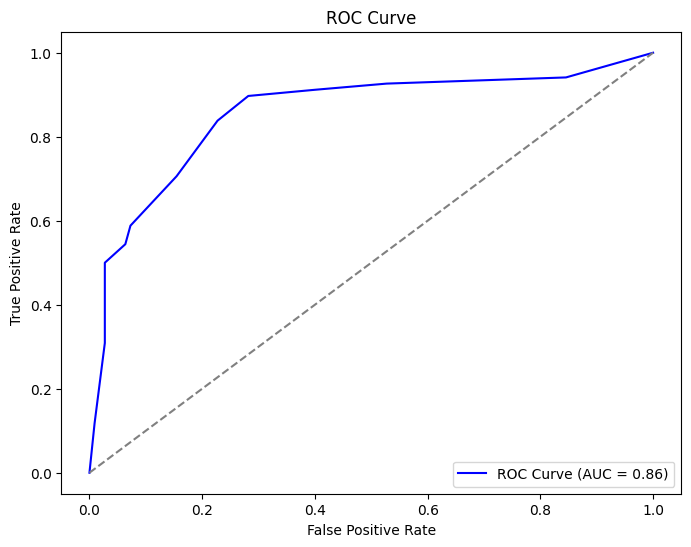

In [93]:
# Get predicted probabilities
y_prob = best_knn.predict_proba(X_test_s)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

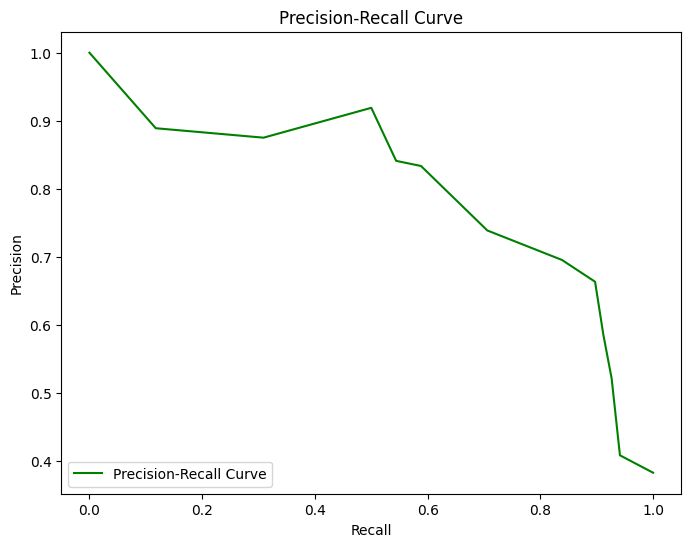

In [94]:
# Get predicted probabilities
y_prob = best_knn.predict_proba(X_test_s)[:, 1]

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

### 3) SVC

In [95]:
svc = SVC(probability=True, random_state=42)

param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

svc_gs = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

svc_gs.fit(X_train_s, y_train)
print("Best parameters found: ", svc_gs.best_params_)
print("Best cross-validation score: ", svc_gs.best_score_)

best_svc = svc_gs.best_estimator_
yhat = best_svc.predict(X_test_s)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters found:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation score:  0.8171377917856791


In [96]:
classification_report_highlighted(y_test, yhat)

🔹 Classification Report
🚨 Accuracy   : 0.8202  (Main Objective!)
✅ Precision  : 0.8750
✅ Recall     : 0.6176
✅ F1 Score   : 0.7241

🔹 Detailed Report:
              precision    recall  f1-score   support

           0       0.80      0.95      0.87       110
           1       0.88      0.62      0.72        68

    accuracy                           0.82       178
   macro avg       0.84      0.78      0.80       178
weighted avg       0.83      0.82      0.81       178



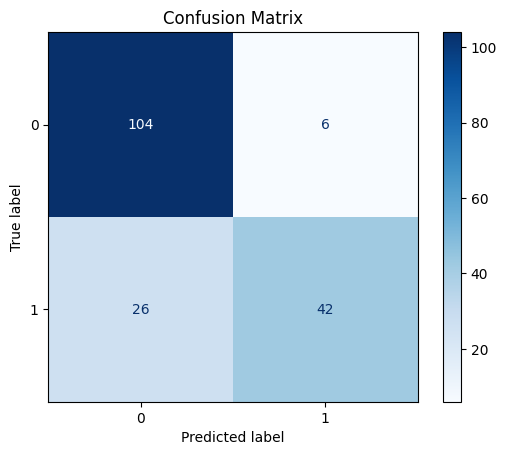

In [97]:
ConfusionMatrixDisplay.from_estimator(best_svc, X_test_s, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

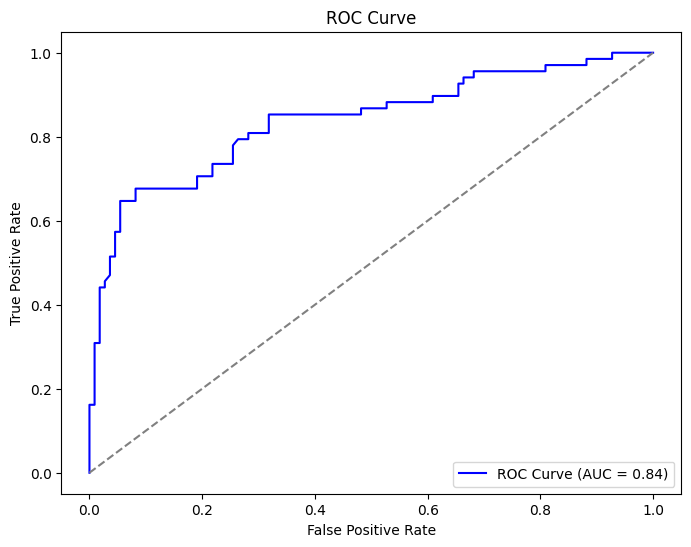

In [98]:
# Get predicted probabilities
y_prob = best_svc.predict_proba(X_test_s)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

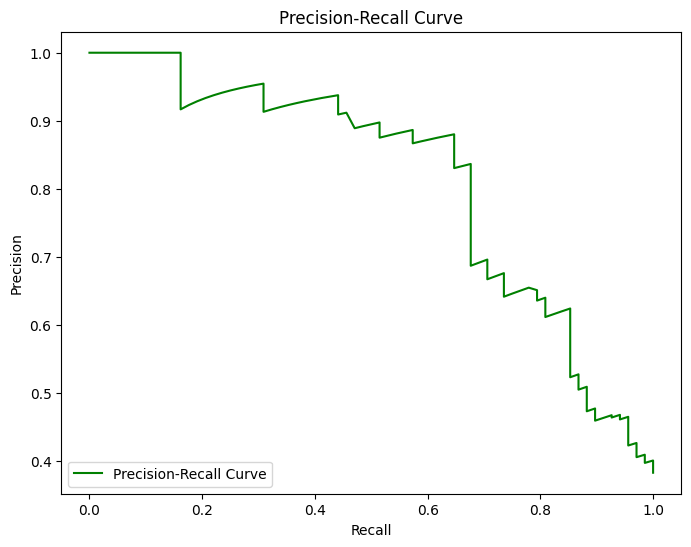

In [99]:
# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

### 4) Random Forest

In [100]:
# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Perform GridSearchCV
rf_gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the model
rf_gs.fit(X_train_s, y_train)

# Print the best parameters and the best cross-validation score
print("Best parameters found: ", rf_gs.best_params_)
print("Best cross-validation score: ", rf_gs.best_score_)

# Get the best estimator
best_rf = rf_gs.best_estimator_

# Make predictions
yhat = best_rf.predict(X_test_s)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validation score:  0.8255687973997834


In [101]:
classification_report_highlighted(y_test, yhat)

🔹 Classification Report
🚨 Accuracy   : 0.8258  (Main Objective!)
✅ Precision  : 0.8364
✅ Recall     : 0.6765
✅ F1 Score   : 0.7480

🔹 Detailed Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       110
           1       0.84      0.68      0.75        68

    accuracy                           0.83       178
   macro avg       0.83      0.80      0.81       178
weighted avg       0.83      0.83      0.82       178



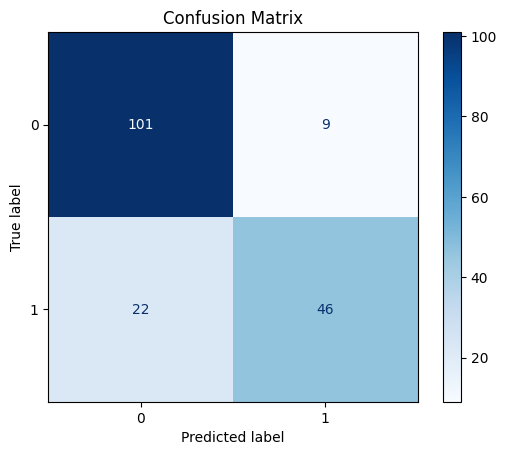

In [102]:
ConfusionMatrixDisplay.from_estimator(best_rf, X_test_s, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

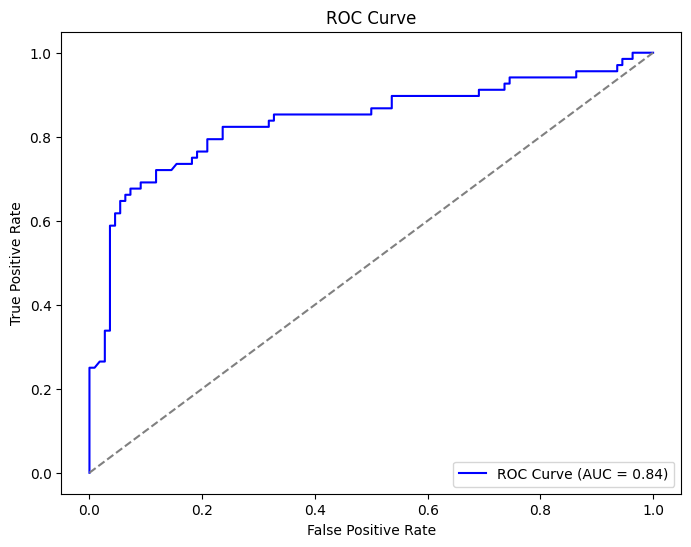

In [103]:
# Get predicted probabilities
y_prob = best_rf.predict_proba(X_test_s)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

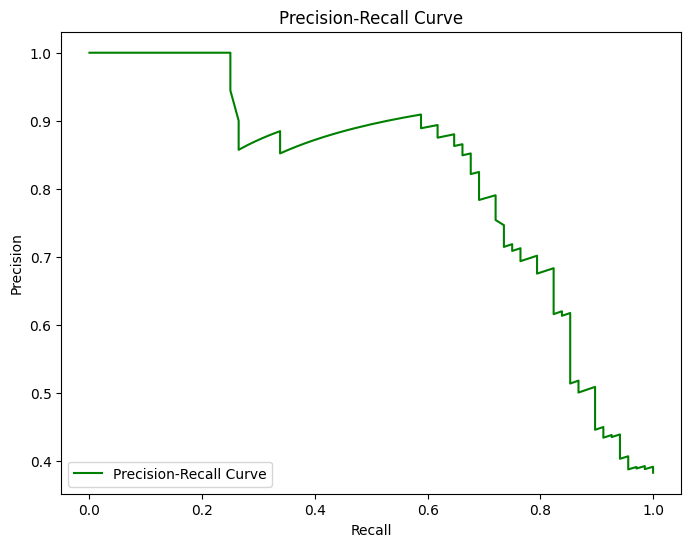

In [104]:
# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

### 5) XGBoost

In [105]:
xgb = XGBClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],  
    'gamma': [0, 1, 5]
}

xgb_gs = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the model
xgb_gs.fit(X_train_s, y_train)

# Print the best parameters and the best cross-validation score
print("Best parameters found: ", xgb_gs.best_params_)
print("Best cross-validation score: ", xgb_gs.best_score_)

# Get the best estimator
best_xgb = xgb_gs.best_estimator_

# Make predictions
yhat = best_xgb.predict(X_test_s)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


Best parameters found:  {'colsample_bytree': 1.0, 'gamma': 1, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
Best cross-validation score:  0.8312321481335566


In [106]:
classification_report_highlighted(y_test, yhat)

🔹 Classification Report
🚨 Accuracy   : 0.8371  (Main Objective!)
✅ Precision  : 0.8000
✅ Recall     : 0.7647
✅ F1 Score   : 0.7820

🔹 Detailed Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       110
           1       0.80      0.76      0.78        68

    accuracy                           0.84       178
   macro avg       0.83      0.82      0.83       178
weighted avg       0.84      0.84      0.84       178



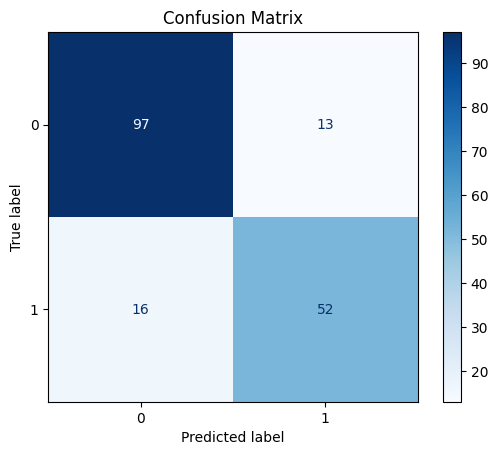

In [107]:
ConfusionMatrixDisplay.from_estimator(best_xgb, X_test_s, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

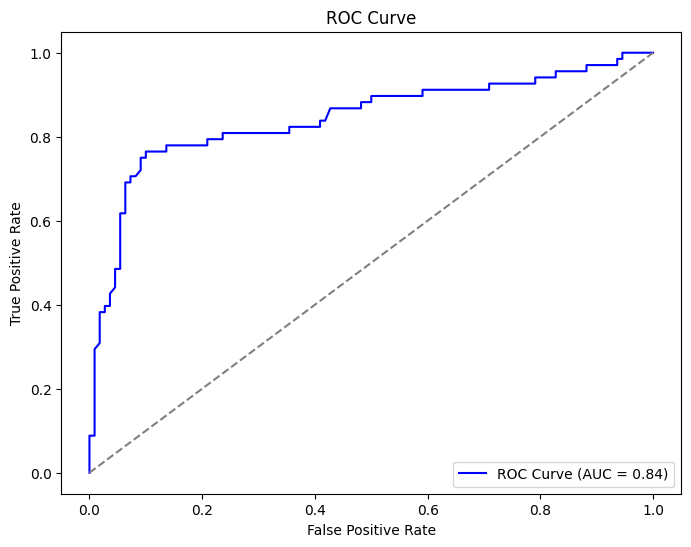

In [108]:
# Get predicted probabilities
y_prob = best_xgb.predict_proba(X_test_s)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

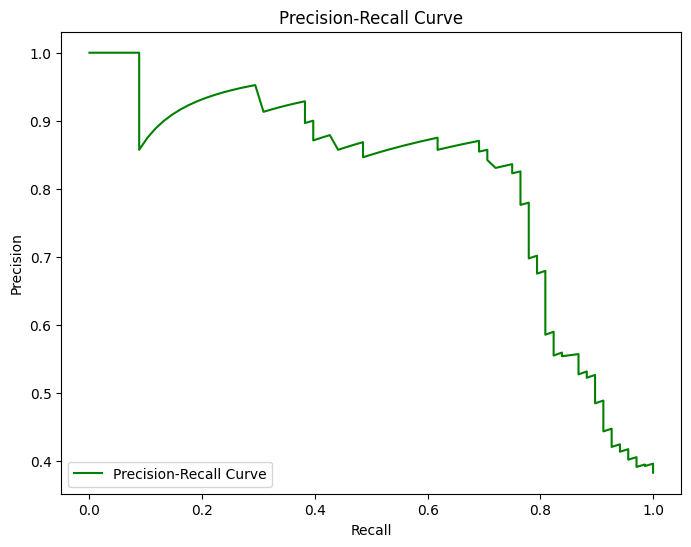

In [109]:
# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

## g. Model Comparison

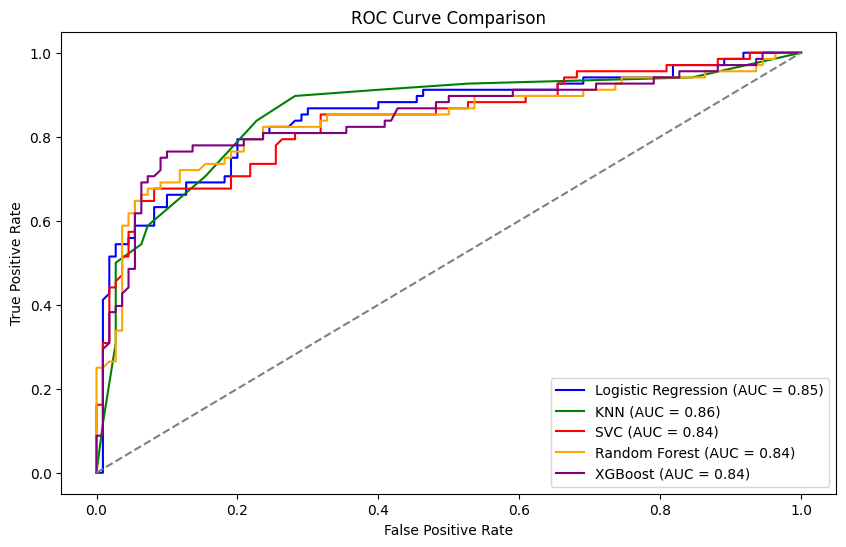

In [110]:
# Plot all ROC curves together on the same axis
plt.figure(figsize=(10, 6))

# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, best_lr.predict_proba(X_test_s)[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')

# KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, best_knn.predict_proba(X_test_s)[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.plot(fpr_knn, tpr_knn, color='green', label=f'KNN (AUC = {roc_auc_knn:.2f})')

# SVC
fpr_svc, tpr_svc, _ = roc_curve(y_test, best_svc.predict_proba(X_test_s)[:, 1])
roc_auc_svc = auc(fpr_svc, tpr_svc)
plt.plot(fpr_svc, tpr_svc, color='red', label=f'SVC (AUC = {roc_auc_svc:.2f})')

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, best_rf.predict_proba(X_test_s)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, color='orange', label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, best_xgb.predict_proba(X_test_s)[:, 1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.plot(fpr_xgb, tpr_xgb, color='purple', label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')

# Plot the diagonal line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Add labels, title, and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

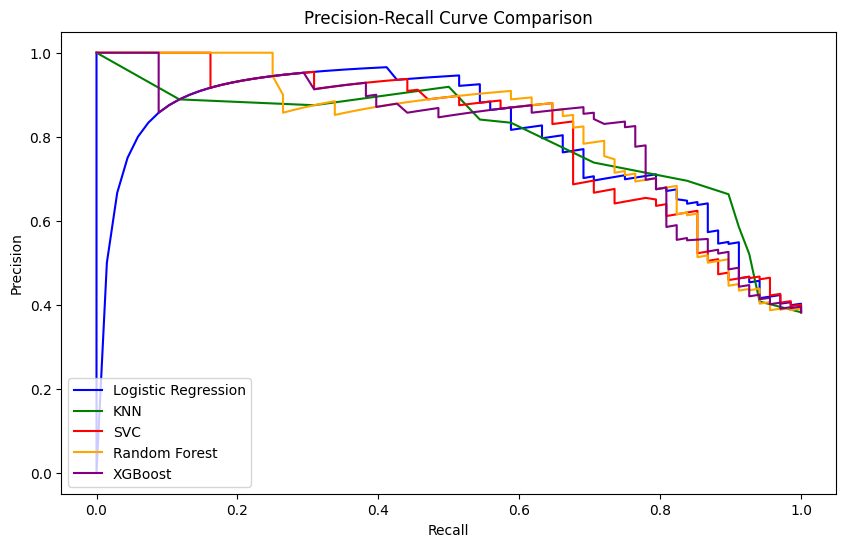

In [111]:
# Plot all Precision-Recall curves together on the same axis
plt.figure(figsize=(10, 6))

# Logistic Regression
precision_lr, recall_lr, _ = precision_recall_curve(y_test, best_lr.predict_proba(X_test_s)[:, 1])
plt.plot(recall_lr, precision_lr, color='blue', label='Logistic Regression')

# KNN
precision_knn, recall_knn, _ = precision_recall_curve(y_test, best_knn.predict_proba(X_test_s)[:, 1])
plt.plot(recall_knn, precision_knn, color='green', label='KNN')

# SVC
precision_svc, recall_svc, _ = precision_recall_curve(y_test, best_svc.predict_proba(X_test_s)[:, 1])
plt.plot(recall_svc, precision_svc, color='red', label='SVC')

# Random Forest
precision_rf, recall_rf, _ = precision_recall_curve(y_test, best_rf.predict_proba(X_test_s)[:, 1])
plt.plot(recall_rf, precision_rf, color='orange', label='Random Forest')

# XGBoost
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, best_xgb.predict_proba(X_test_s)[:, 1])
plt.plot(recall_xgb, precision_xgb, color='purple', label='XGBoost')

# Add labels, title, and legend
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend(loc='lower left')
plt.show()

In [112]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "AUC (ROC)": roc_auc_score(y_test, y_prob) if y_prob is not None else "N/A"
    }
    return metrics

# Evaluate all models
models = {
    "Logistic Regression": best_lr,
    "KNN": best_knn,
    "SVC": best_svc,
    "Random Forest": best_rf,
    "XGBoost": best_xgb
}

results = {}
for model_name, model in models.items():
    results[model_name] = evaluate_model(model, X_test_s, y_test)

# Display results in a DataFrame
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="AUC (ROC)", ascending=False)  # Sort by AUC (ROC)
print(results_df)

                     Accuracy  Precision    Recall  F1-Score  AUC (ROC)
KNN                  0.792135   0.738462  0.705882  0.721805   0.855949
Logistic Regression  0.797753   0.758065  0.691176  0.723077   0.851471
XGBoost              0.837079   0.800000  0.764706  0.781955   0.843917
Random Forest        0.825843   0.836364  0.676471  0.747967   0.839037
SVC                  0.820225   0.875000  0.617647  0.724138   0.838102


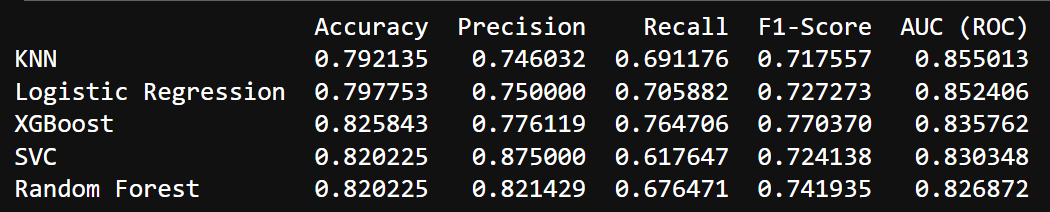

# 5. Submission

In [123]:
df_test = pd.read_csv('datasets/titanic/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [124]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [125]:
# Step 1: Drop irrelevant features
df_test = df_test.drop(columns=['Name', 'Ticket', 'Cabin'])

# Step 2: Handle missing values
# Drop rows with missing 'Embarked'
df_test = df_test.dropna(subset=['Embarked'])

# Fill missing 'Age' values with the median from the training data
df_test['Age'].fillna(df_imputate['Age'].median(), inplace=True)

# Fill missing 'Fare' values with the median from the training data
df_test['Fare'].fillna(df_imputate['Fare'].median(), inplace=True)

# Step 3: Feature Engineering
# Create 'Family_Size'
df_test['Family_Size'] = df_test['SibSp'] + df_test['Parch'] + 1

# Create 'Is_Alone'
df_test['Is_Alone'] = np.where(df_test['Family_Size'] == 1, 1, 0)

# Step 4: Feature Encoding
# Encode 'Sex'
df_test['Sex'] = sex_encoder.transform(df_test['Sex'])

# Encode 'Embarked'
embarked_encoded_test = embarked_encoder.transform(df_test[['Embarked']])
encoded_df_test = pd.DataFrame(embarked_encoded_test, 
                                columns=embarked_encoder.get_feature_names_out(["Embarked"]), 
                                index=df_test.index)
df_test = df_test.join(encoded_df_test)
df_test = df_test.drop(columns=['Embarked'])

# Step 5: Drop unnecessary features
df_test = df_test.drop(columns=['SibSp', 'Parch', 'Family_Size', 'Embarked_Q'])

# Step 6: Scale numerical features
scaling_features = ['Age', 'Fare']
df_test[scaling_features] = s.transform(df_test[scaling_features])  # Use the scaler fitted on training data

# Final preprocessed testing data
df_test.head()

,PassengerId,Pclass,Sex,Age,Fare,Is_Alone,Embarked_S
0,892,3,1,0.391613,-0.487301,1,0.0
1,893,3,0,1.352160,-0.504118,0,1.0
2,894,2,1,2.504816,-0.449614,1,0.0
3,895,3,1,-0.184715,-0.470401,1,1.0
4,896,3,0,-0.568933,-0.396884,0,1.0


In [126]:
# Step 7: Make predictions using the best model (XGBoost)
y_pred = best_xgb.predict(df_test.drop(columns=['PassengerId']))

# Step 8: Prepare the submission DataFrame
submission = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': y_pred
})

In [128]:
# Step 9: Save the submission file
submission.to_csv('submission.csv', index=False)

# Step 10: Display the first few rows of the submission DataFrame
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [ ]:
# Step 11: Save the model using joblib
import joblib
joblib.dump(best_xgb, 'best_xgboost_model.pkl')
# Load the model
loaded_model = joblib.load('best_xgboost_model.pkl')

**Submission Score**: 0.77033